In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error


import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 5]

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Desktop\College\Sem7\DL\M1_DL_Project\DL_MiniProject\datasets\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
cat_features = df.select_dtypes(include = 'object').columns
num_features = df.select_dtypes(include = ['int', 'float']).columns

In [7]:
cat_features.values

array(['sex', 'smoker', 'region'], dtype=object)

In [8]:
num_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [9]:
for i in cat_features:
    print(df[i].value_counts())
    print('\n'+'-'*50)

sex
male      676
female    662
Name: count, dtype: int64

--------------------------------------------------
smoker
no     1064
yes     274
Name: count, dtype: int64

--------------------------------------------------
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

--------------------------------------------------


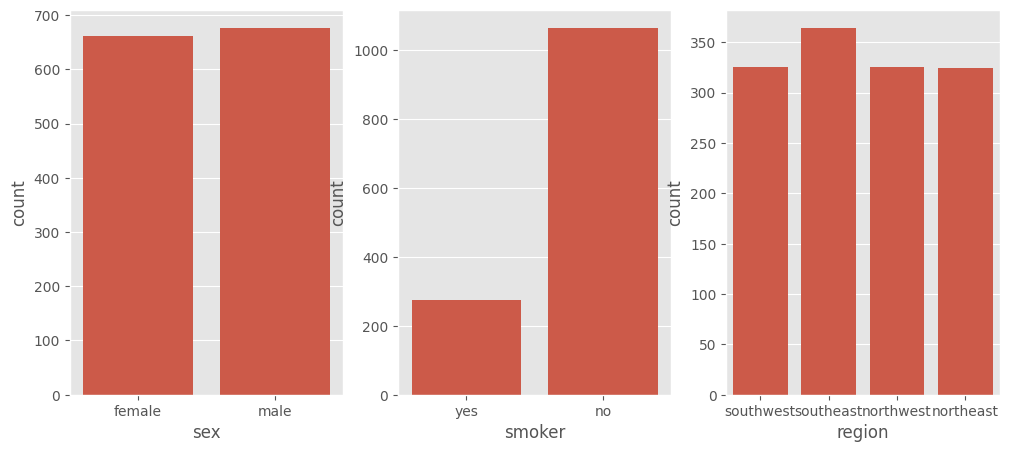

In [10]:
fig, ax = plt.subplots(nrows= int(np.ceil(len(cat_features) / 3)), ncols = 3)
ax = ax.flatten()
for i, column in enumerate(cat_features):
    sns.countplot(df, x = df[column], ax = ax[i])

In [11]:
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])
df['region'] = encoder.fit_transform(df['region'])

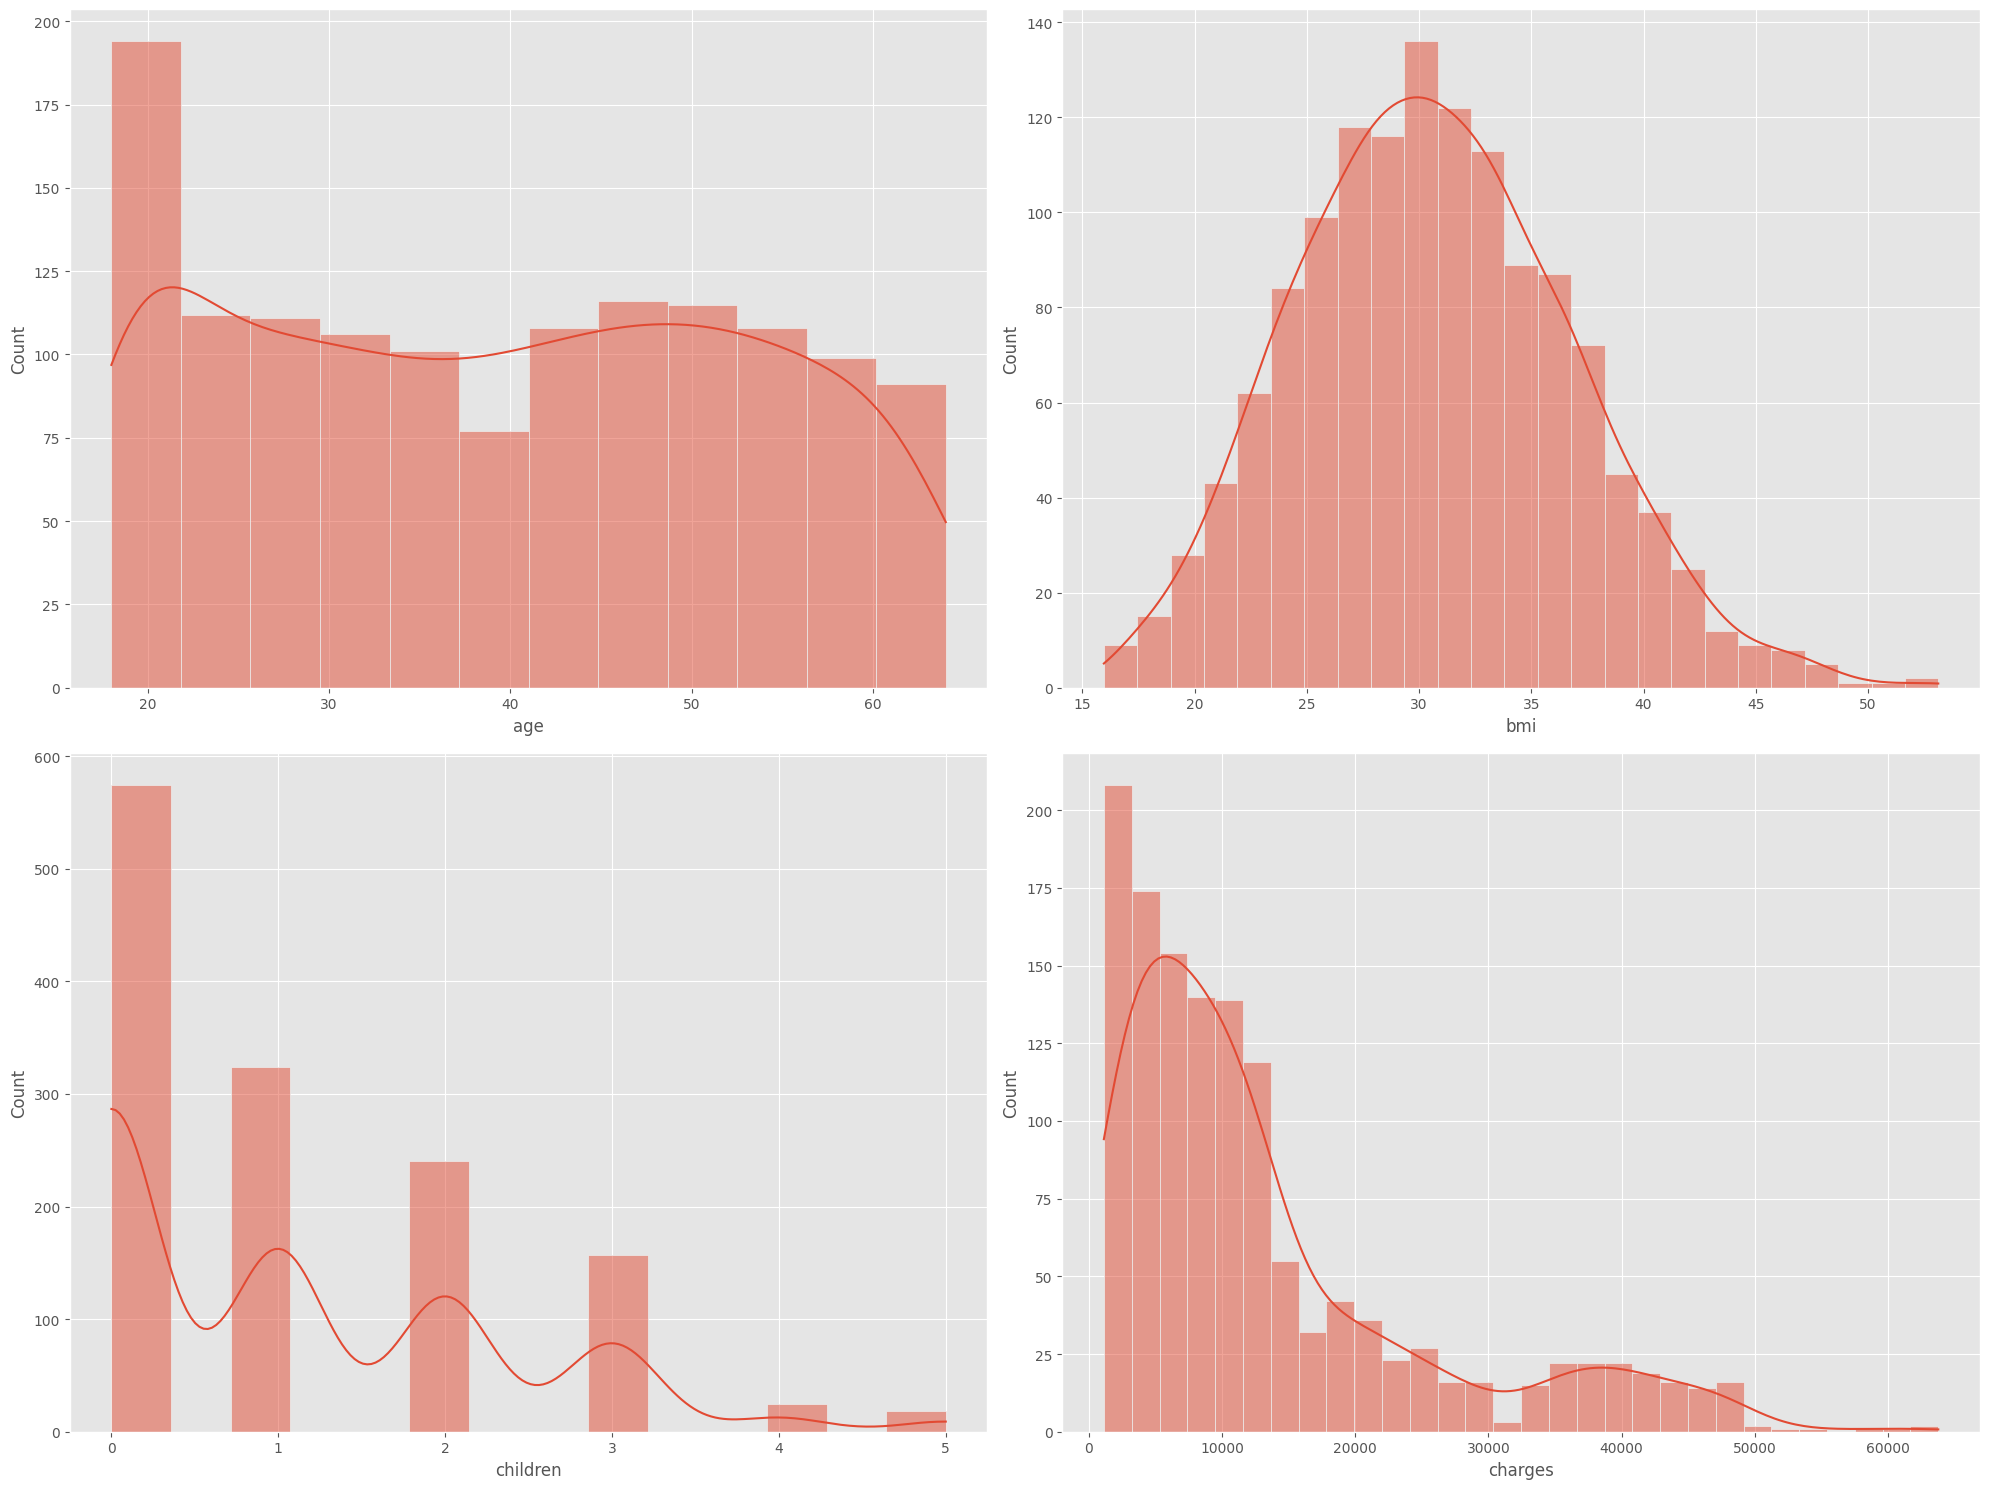

In [12]:
fig, axes = plt.subplots( nrows= 2, ncols=2, figsize = (20,15))
axes = axes.flatten()

for i , column in enumerate(num_features):
    ax = axes[i]
    sns.histplot(df[column], kde=True, ax=ax)

plt.tight_layout()
plt.show()

<Axes: >

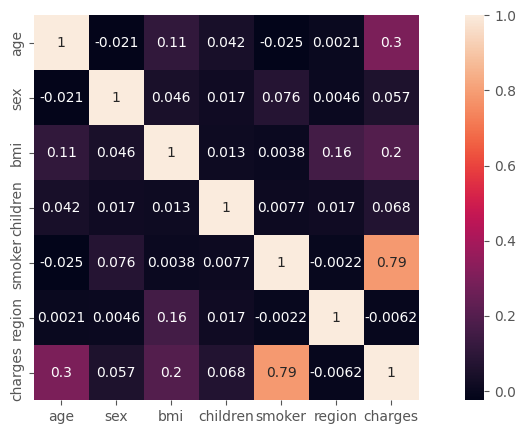

In [13]:
f, ax = plt.subplots()
corr = df.corr()
sns.heatmap(corr,annot = True, square=True, ax=ax)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

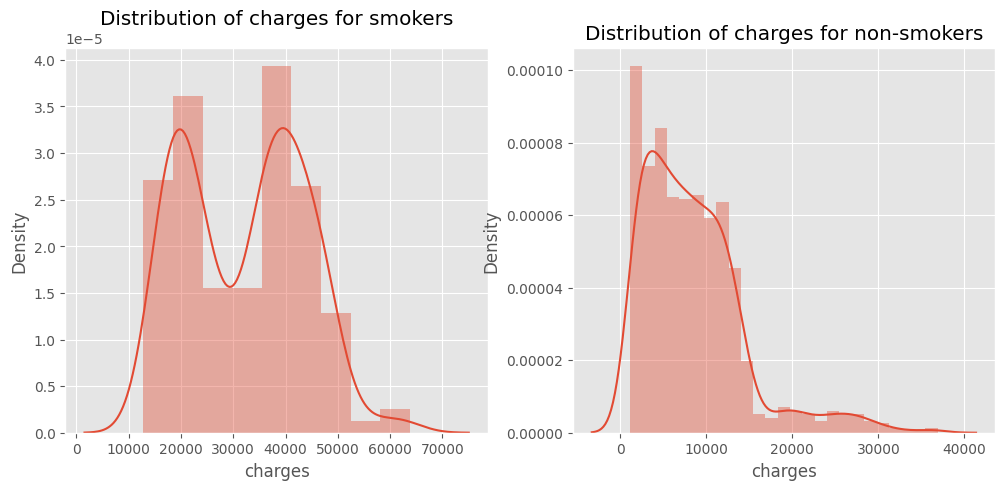

In [14]:
fig, axis = plt.subplots(nrows = 1, ncols = 2)
ax = axis.flatten()
sns.distplot(df[df.smoker == 1]["charges"], ax = ax[0])
ax[0].set_title("Distribution of charges for smokers")
sns.distplot(df[df.smoker == 0]["charges"], ax = ax[1])
ax[1].set_title("Distribution of charges for non-smokers")

<Axes: xlabel='smoker', ylabel='count'>

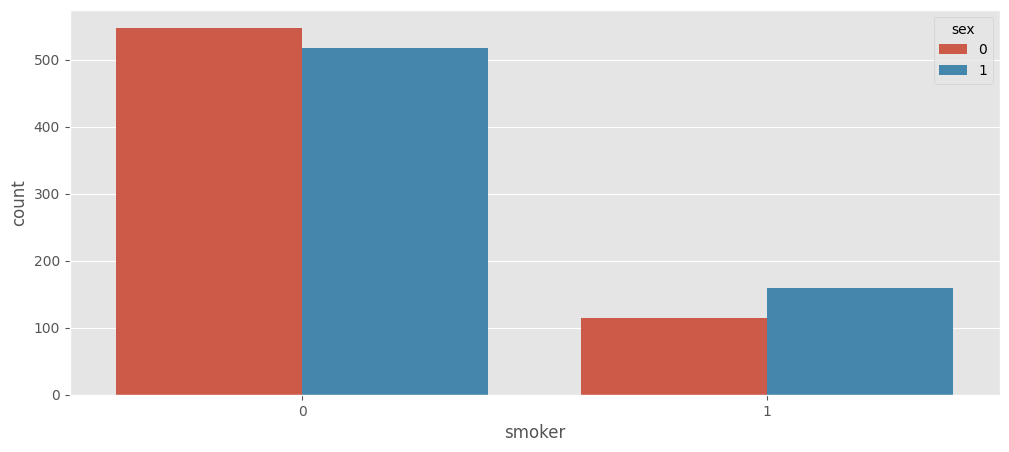

In [15]:
sns.countplot(data = df, x= 'smoker', hue = 'sex')

In [16]:
x = df.drop("charges", axis = 1)
y = df["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lr = LinearRegression().fit(x_train_scaled, y_train)

In [17]:
print(f'model accuracy on training set : {lr.score(x_train_scaled, y_train)}')
print(f'modle accuracy on test set : {lr.score(x_test_scaled, y_test)}')

model accuracy on training set : 0.7417049283233981
modle accuracy on test set : 0.7833463107364537


In [18]:
pf = PolynomialFeatures(degree = 3)
x_train_quad = pf.fit_transform(x_train_scaled)
x_test_quad = pf.transform(x_test_scaled)

lr_pf = LinearRegression().fit(x_train_quad, y_train)

In [19]:
print(f'model accuracy on training set : {lr_pf.score(x_train_quad, y_train)}')
print(f'modle accuracy on test set : {lr_pf.score(x_test_quad, y_test)}')

model accuracy on training set : 0.8500312302291066
modle accuracy on test set : 0.8615579240144865


In [20]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'squared_error',
                              max_depth= 4,
                              random_state = 42,
                              n_jobs = -1)
forest.fit(x_train_scaled, y_train)
forest_train_pred = forest.predict(x_train_scaled)
forest_test_pred = forest.predict(x_test_scaled)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 18381787.853, MSE test data: 20037431.207
R2 train data: 0.873, R2 test data: 0.871


In [21]:
import joblib

# Save the Linear Regression model
joblib.dump(lr_pf, 'linear_regression_poly_model.pkl')

# Save the Random Forest model
joblib.dump(forest, 'random_forest_model.pkl')

# Save the scaler (important to scale inputs the same way when loading)
scaler=StandardScaler()
joblib.dump(scaler, 'scaler.pkl')

# Save the Polynomial Features transformer
joblib.dump(pf, 'polynomial_features.pkl')


['polynomial_features.pkl']